In [13]:
import time 
import numpy as np
import matplotlib.pyplot as plt
# target funciton

def target(x):
    return 100*(x[0]**2-x[1])**2+(1-x[0])**2

size=30 #编码个数
dimen=2 #编码维数

x_max=np.array([2.048,2.048])
x_min=np.array([-2.048,-2.048])

gener=10 #进化次数
F=1.2  #变异因子
cr=0.6*np.ones((size,dimen)) #交叉因子

In [14]:
# initial x
p=x_min+(x_max-x_min)*np.random.random((size,dimen))
target_his=[]
x_his=[]

In [15]:
# evolution
t1=time.time()
r_index=np.array([range(size),range(size),range(size)])
for g in range(gener):
    #aberrance
    v=h=np.zeros((size,dimen))
    r=np.zeros((size,3)).T
    t3=time.time()
    while (r[0]==r[1]).any()  or (r[0]==r[2]).any() or (r[1]==r[2]).any() or (r==r_index).any() :
        r=np.around((size-1)*np.random.random((size,3))).T.astype(int)
    h=p[r[0]]+F*(p[r[1]]-p[r[2]])
    h=np.where(h<x_max,h,x_max)
    h=np.where(h>x_min,h,x_min)
    temp=np.random.random((size,dimen))
    v=np.where(temp<cr,h,p)
    t4=time.time()
    
    #select
    p=np.where(target(v.T).reshape(size,1)>target(p.T).reshape(size,1),v,p)

    #update
    opt_x=np.argmax(target(p))
    x_his.append(p[opt_x])
    opt_target=np.max(target(p))
    target_his.append(opt_target)

t2=time.time()

In [21]:
print('花费时间%.4fs'%(t2-t1))
print('最大值%.4f'%target_his[-1])
print(x_his[-1])

花费时间0.1754s
最大值3905.9262
[-2.048 -2.048]


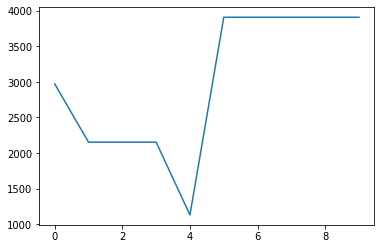

In [17]:
plt.figure()
plt.plot(target_his)
plt.show()